In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import missingno as msno

from sklearn.metrics import f1_score

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

from sklearn.preprocessing import StandardScaler # Análisis de PCA
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier # Generación de modelo de random forest
from sklearn.ensemble import BaggingClassifier # Generación de modelos de bagging
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from pandas_profiling import ProfileReport

In [25]:
obj = pd.read_csv(r'C:\Users\nelna\OneDrive\Alejandro Cookbook\Analisis de datos\Allianz\Datathon_Allianz-main\Datathon\paid_record.csv', delimiter = ',')
obj

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [26]:
df = obj

In [27]:
df['STATUS']=df['STATUS'].replace(to_replace = ['C'], value = -2 )
df['STATUS']=df['STATUS'].replace(to_replace = ['X'], value = -1 )

In [28]:
df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,-2
...,...,...,...
1048570,5150487,-25,-2
1048571,5150487,-26,-2
1048572,5150487,-27,-2
1048573,5150487,-28,-2


In [29]:
df.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [30]:
df['STATUS']=pd.to_numeric(df['STATUS'])
df.dtypes

ID                int64
MONTHS_BALANCE    int64
STATUS            int64
dtype: object

In [31]:
dfmalos = df[df['STATUS']>0]
dfmalos

,ID,MONTHS_BALANCE,STATUS
150,5001718,-8,1
154,5001718,-12,1
224,5001720,0,1
227,5001720,-3,1
228,5001720,-4,1
...,...,...,...
1048241,5150464,-9,1
1048242,5150464,-10,1
1048243,5150464,-11,1
1048244,5150464,-12,1


In [32]:
listamalos = list(set(dfmalos['ID']))
listamalos

[5046281,
 5079049,
 5046324,
 5046328,
 5046333,
 5046340,
 5046343,
 5046347,
 5079118,
 5046360,
 5046361,
 5046362,
 5046382,
 5079166,
 5079167,
 5079168,
 5079171,
 5079180,
 5046416,
 5079185,
 5079200,
 5079201,
 5079222,
 5079225,
 5079226,
 5079231,
 5079232,
 5079236,
 5046478,
 5079248,
 5046481,
 5079250,
 5046483,
 5079251,
 5046485,
 5079258,
 5079284,
 5079286,
 5046531,
 5046532,
 5046533,
 5046565,
 5112598,
 5112599,
 5112600,
 5112601,
 5112634,
 5112636,
 5112647,
 5112650,
 5112661,
 5112662,
 5112663,
 5112665,
 5112672,
 5112675,
 5112677,
 5112684,
 5112685,
 5112695,
 5112729,
 5112737,
 5112738,
 5112746,
 5112756,
 5112787,
 5112796,
 5112798,
 5112799,
 5112802,
 5112803,
 5112806,
 5112809,
 5112830,
 5112832,
 5112850,
 5112852,
 5112858,
 5112887,
 5112903,
 5112904,
 5145690,
 5112924,
 5112932,
 5112933,
 5145706,
 5145708,
 5145714,
 5145716,
 5145717,
 5145721,
 5112961,
 5112963,
 5145740,
 5145745,
 5145746,
 5112981,
 5112985,
 5112990,
 5145760,


In [33]:
df2 = df[df.ID.isin(listamalos) == False]
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,-2
...,...,...,...
1048570,5150487,-25,-2
1048571,5150487,-26,-2
1048572,5150487,-27,-2
1048573,5150487,-28,-2


In [34]:
df3 = df2[df2['MONTHS_BALANCE'] <= -2]
df3

,ID,MONTHS_BALANCE,STATUS
2,5001711,-2,0
3,5001711,-3,0
6,5001712,-2,-2
7,5001712,-3,-2
8,5001712,-4,-2
...,...,...,...
1048570,5150487,-25,-2
1048571,5150487,-26,-2
1048572,5150487,-27,-2
1048573,5150487,-28,-2


In [35]:
df4 = df3.sort_values(by = 'MONTHS_BALANCE', ascending = True)
df4

,ID,MONTHS_BALANCE,STATUS
599516,5074580,-60,0
417074,5050478,-60,0
518621,5061810,-60,0
1000907,5143482,-60,0
229951,5021701,-60,-1
...,...,...,...
687897,5092292,-2,-2
413935,5048486,-2,-1
163990,5012482,-2,-1
1014850,5146479,-2,0


In [36]:
 df5 =  df4.drop_duplicates(subset='ID', keep="first")
 df5

,ID,MONTHS_BALANCE,STATUS
599516,5074580,-60,0
417074,5050478,-60,0
518621,5061810,-60,0
1000907,5143482,-60,0
229951,5021701,-60,-1
...,...,...,...
965707,5137542,-2,0
411933,5048321,-2,-1
163721,5012465,-2,0
796180,5114454,-2,0


In [37]:
df5['Target'] = 1
df5

C:\Users\nelna\AppData\Local\Temp/ipykernel_12812/4251217173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Target'] = 1


,ID,MONTHS_BALANCE,STATUS,Target
599516,5074580,-60,0,1
417074,5050478,-60,0,1
518621,5061810,-60,0,1
1000907,5143482,-60,0,1
229951,5021701,-60,-1,1
...,...,...,...,...
965707,5137542,-2,0,1
411933,5048321,-2,-1,1
163721,5012465,-2,0,1
796180,5114454,-2,0,1


In [38]:
df6 =df5[['ID','Target']]
df6

,ID,Target
599516,5074580,1
417074,5050478,1
518621,5061810,1
1000907,5143482,1
229951,5021701,1
...,...,...
965707,5137542,1
411933,5048321,1
163721,5012465,1
796180,5114454,1


In [39]:
df6.to_csv(r'C:\Users\nelna\OneDrive\Alejandro Cookbook\Analisis de datos\Allianz\Datathon_Allianz-main\Datathon\target.csv', index=True, header=True)


In [40]:
cualitativo = pd.read_csv(r'C:\Users\nelna\OneDrive\Alejandro Cookbook\Analisis de datos\Allianz\Datathon_Allianz-main\Datathon\main.csv', delimiter = ',')
cualitativo

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578


In [44]:
cualitativo['ID'] = cualitativo['Main_ID'] 
cualitativo = cualitativo.drop('Main_ID', axis=1)
cualitativo

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578


In [45]:
target = df6

In [46]:
merged = pd.merge(cualitativo,target, how='left')
merged

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,ID,Target
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,NaN
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,NaN
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,1.0
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808,1.0
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574,NaN
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575,NaN
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576,NaN
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578,NaN


In [47]:
merged['Target'] = merged['Target'].fillna(0)
merged

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,ID,Target
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,0.0
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,0.0
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,1.0
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808,1.0
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574,0.0
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575,0.0
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576,0.0
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578,0.0


In [49]:
direc = pd.read_csv(r'C:\Users\nelna\OneDrive\Alejandro Cookbook\Analisis de datos\Allianz\Datathon_Allianz-main\Datathon\address - address.csv', delimiter = ',')
direc

,New_ID,ID,ADDRESS
0,5008804L,5008804,"06042, CT, 31 Mitchell Road"
1,5008805G,5008805,"72703, AR, 1189 Northwest End Avenue"
2,5008806D,5008806,"72701, AR, 218 Shipley Alley"
3,5008808I,5008808,"3138 P Street Northwest, 20007, DC"
4,5008809Z,5008809,"2405 230th Street, 21122, MD"
...,...,...,...
438752,5680433,5680433,"37080, TN, 7730 Wilkinson Road"
438753,5353755,5353755,"2815 Saint Edwards Drive, 37211, TN"
438754,5689895,5689895,"85306, AZ, 5434 West Beck Lane"
438755,5833391,5833391,"05641, VT, 21 Hill Street"


In [50]:

direc = direc.drop('New_ID', axis=1)
direc

,ID,ADDRESS
0,5008804,"06042, CT, 31 Mitchell Road"
1,5008805,"72703, AR, 1189 Northwest End Avenue"
2,5008806,"72701, AR, 218 Shipley Alley"
3,5008808,"3138 P Street Northwest, 20007, DC"
4,5008809,"2405 230th Street, 21122, MD"
...,...,...
438752,5680433,"37080, TN, 7730 Wilkinson Road"
438753,5353755,"2815 Saint Edwards Drive, 37211, TN"
438754,5689895,"85306, AZ, 5434 West Beck Lane"
438755,5833391,"05641, VT, 21 Hill Street"


In [51]:
mergedfinal = pd.merge(merged,direc, how='left')


In [52]:
mergedfinal

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,ID,Target,ADDRESS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,0.0,"06042, CT, 31 Mitchell Road"
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,0.0,"72703, AR, 1189 Northwest End Avenue"
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,1.0,"72701, AR, 218 Shipley Alley"
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,...,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808,1.0,"3138 P Street Northwest, 20007, DC"
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,...,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809,1.0,"2405 230th Street, 21122, MD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439046,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,...,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574,0.0,"95503, CA, 461 Alder Street"
439047,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,...,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575,0.0,"93906, CA, 1536 North Main Street"
439048,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,...,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576,0.0,"32408, FL, 4216 Lorraine Street"
439049,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,...,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578,0.0,"1820 22nd Street Southeast, 20020, DC"


In [54]:
mergedfinal.to_csv(r'C:\Users\nelna\OneDrive\Alejandro Cookbook\Analisis de datos\Allianz\Datathon_Allianz-main\Datathon\SemiFinal.csv', index=True, header=True)

In [55]:
df = mergedfinal

In [59]:
dff = df

CODE_GENDER


Unique values  3
Values counts:
F      287436
M      140746
NaN     10869
Name: CODE_GENDER, dtype: int64



count     428182
unique         2
top            F
freq      287436
Name: CODE_GENDER, dtype: object




------------------------------------------------------
FLAG_OWN_CAR


Unique values  3
Values counts:
N      268850
Y      159143
NaN     11058
Name: FLAG_OWN_CAR, dtype: int64



count     427993
unique         2
top            N
freq      268850
Name: FLAG_OWN_CAR, dtype: object




------------------------------------------------------
FLAG_OWN_REALTY


Unique values  3
Values counts:
Y      296862
N      131225
NaN     10964
Name: FLAG_OWN_REALTY, dtype: int64



count     428087
unique         2
top            Y
freq      296862
Name: FLAG_OWN_REALTY, dtype: object




------------------------------------------------------
CNT_CHILDREN


Unique values  13
Values counts:
0.0     296871
1.0      86377
2.0      38933
NaN      10943
3.0       5294
4.0        47

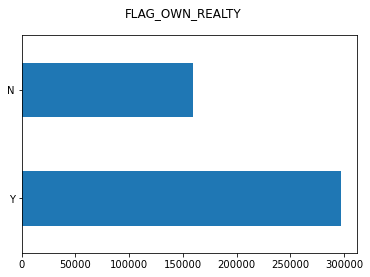

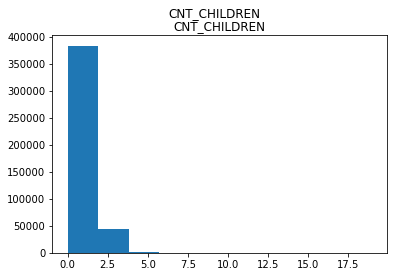

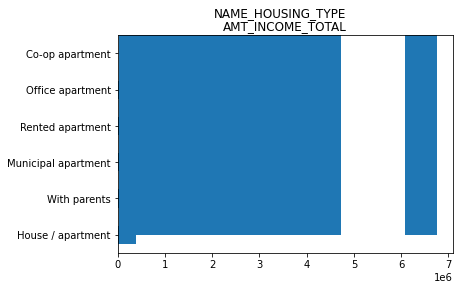

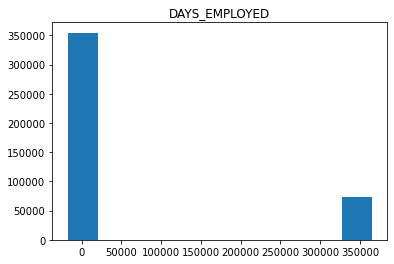

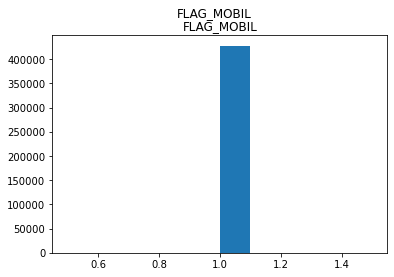

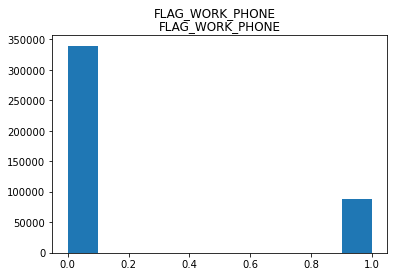

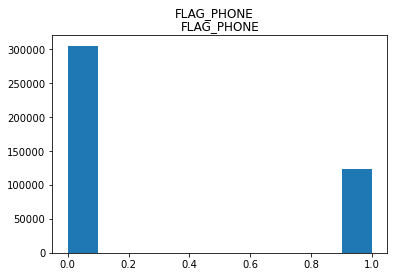

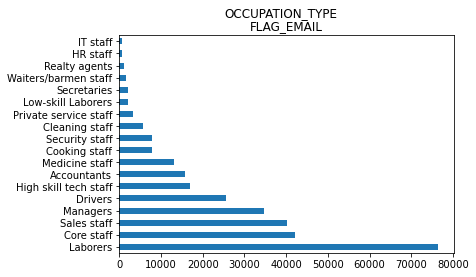

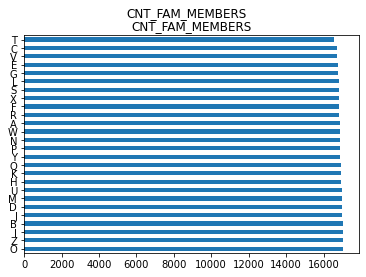

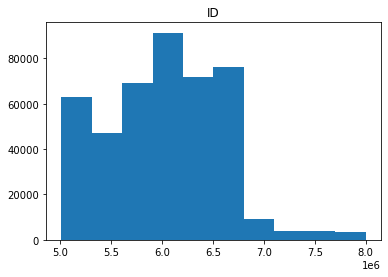

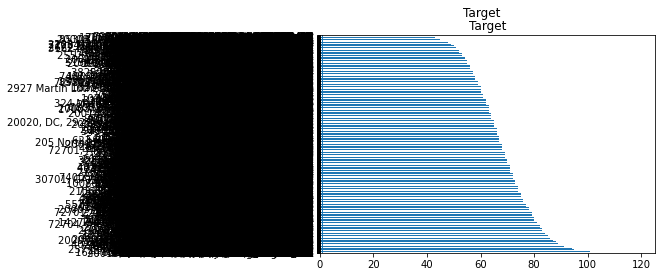

In [56]:
# Se analiza columna a columna el número de valores únicos que tiene cada celda

for col in df:
    print(col)
    print('\n')

    if df[col].dtype != object: 
    # print(column)
        plt.figure()
        plt.title(col)
        plt.hist(df[col])

    else:
    
        df[col].value_counts().plot(kind='barh')

    print("Unique values  {}".format(df[col].nunique(dropna=False)))

    if df[col].nunique() > 20:
        print('The column has more than 20 values')
    else:
        plt.suptitle(col)
        print("Values counts:\n{}".format(df[col].value_counts(dropna=False)))

    print('\n\n')
    
    print(df[col].describe())
    
    print('\n')

    # df[col].plot(kind='hist')

    

    print('\n')

    print('------------------------------------------------------')

<AxesSubplot:>

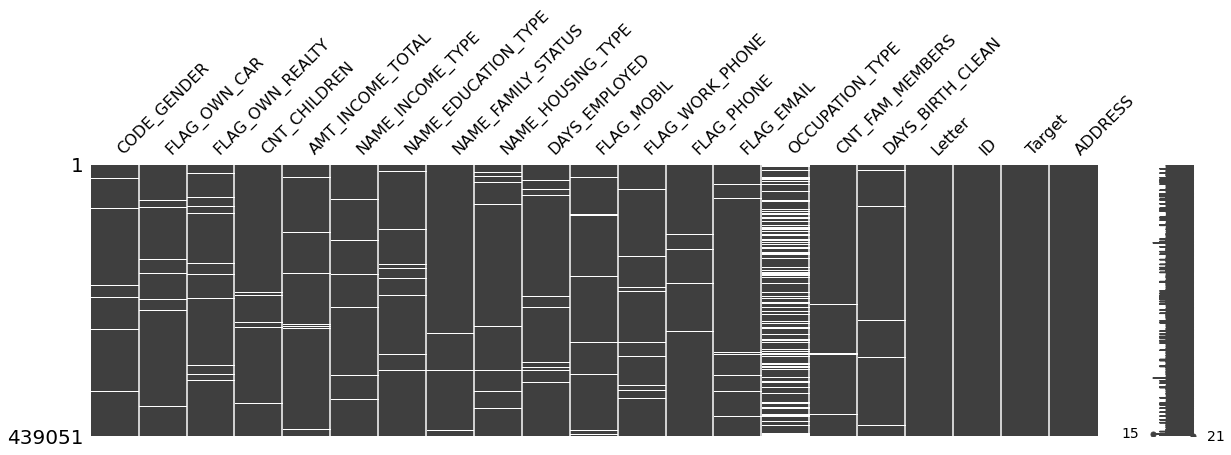

In [58]:
msno.matrix(dff, figsize=(20,5))

In [61]:
df['CODE_GENDER']=df['CODE_GENDER'].fillna(value='NoIndica')
df['FLAG_OWN_CAR']=df['FLAG_OWN_CAR'].fillna(value='N')
df['FLAG_OWN_REALTY']=df['FLAG_OWN_REALTY'].fillna(value='N')
df['CNT_CHILDREN']=df['CNT_CHILDREN'].fillna(value=0)
df['NAME_INCOME_TYPE']=df['NAME_INCOME_TYPE'].fillna(value='NoIndica')
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].fillna(value='NoIndica')
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].fillna(value='Single / not married')
df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].fillna(value='NoIndica')
df['FLAG_WORK_PHONE']=df['FLAG_WORK_PHONE'].fillna(value=0)
df['FLAG_EMAIL']=df['FLAG_EMAIL'].fillna(value=0)
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna(value='NoIndica')
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].fillnavalue=df['CNT_FAM_MEMBERS'].median()

<AxesSubplot:>

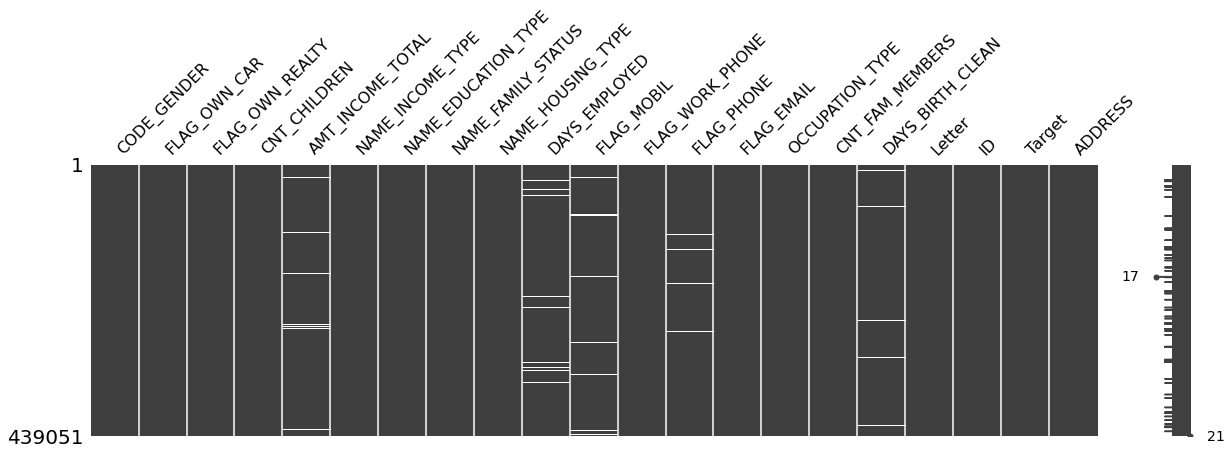

In [62]:
msno.matrix(df, figsize=(20,5))

In [64]:
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL'].fillnavalue=df['AMT_INCOME_TOTAL'].median()
df['DAYS_BIRTH_CLEAN']=df['DAYS_BIRTH_CLEAN'].fillna(value='DAYS_BIRTH_CLEAN')



<AxesSubplot:>

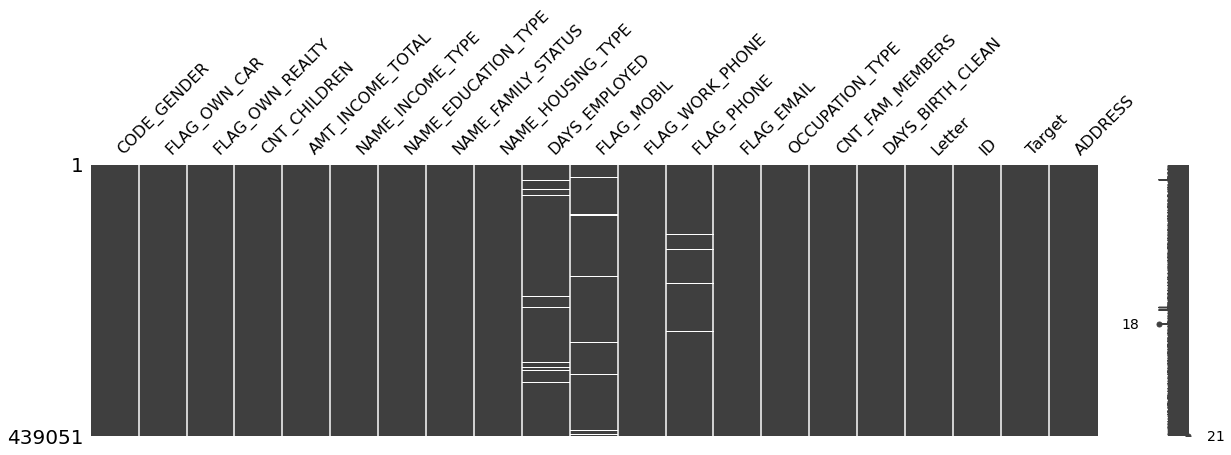

In [65]:
msno.matrix(df, figsize=(20,5))

In [69]:
df4 = df[df['DAYS_EMPLOYED'] > 2]

<AxesSubplot:>

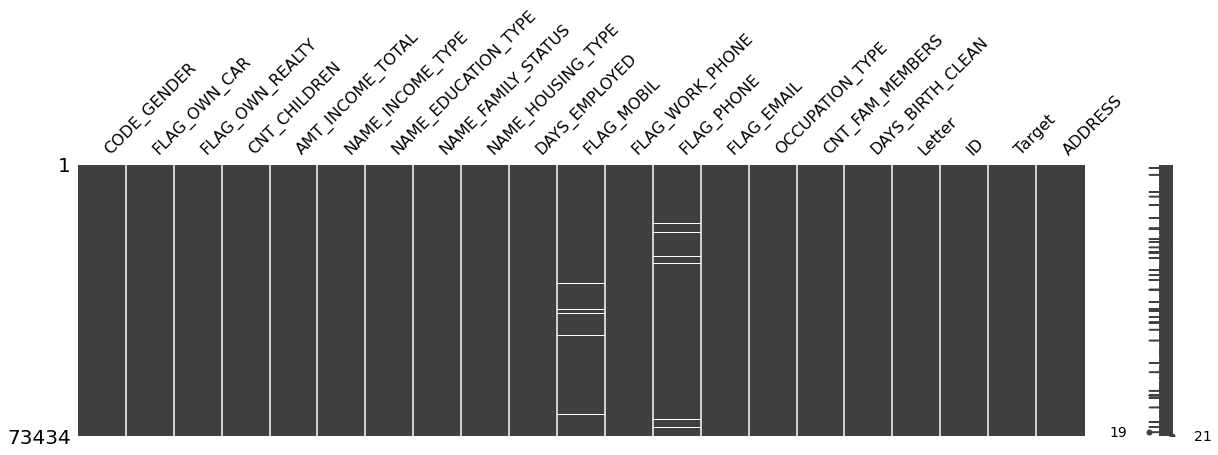

In [70]:
msno.matrix(df4, figsize=(20,5))

In [72]:
df5 = df4.drop([ "Letter", "FLAG_MOBIL", "FLAG_PHONE", "FLAG_EMAIL"], axis = 1)

<AxesSubplot:>

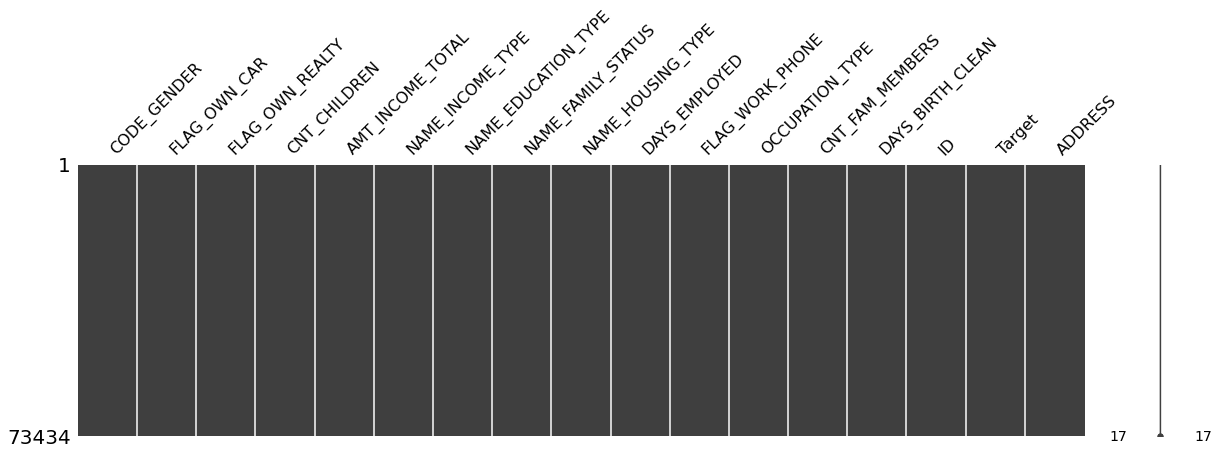

In [73]:
msno.matrix(df5, figsize=(20,5))

In [74]:
df5

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,ID,Target,ADDRESS
7,F,N,Y,0.0,162000.0,Pensioner,Higher education,Separated,House / apartment,365243.0,0.0,NoIndica,2.0,20/08/1961,5008812,1.0,"80004, CO, 8380 West 67th Avenue"
8,F,N,Y,0.0,162000.0,Pensioner,Higher education,Separated,House / apartment,365243.0,0.0,NoIndica,2.0,20/08/1961,5008813,1.0,"06040, CT, 824 Main Street"
9,F,N,Y,0.0,162000.0,Pensioner,Higher education,Separated,House / apartment,365243.0,0.0,NoIndica,2.0,20/08/1961,5008814,1.0,"93667, CA, 29104 Quartz Lane"
76,F,N,Y,0.0,162000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,365243.0,0.0,NoIndica,2.0,15/11/1967,5008884,1.0,"06042, CT, 182 Irving Street"
160,F,N,Y,0.0,162000.0,NoIndica,NoIndica,Married,House / apartment,365243.0,0.0,NoIndica,2.0,12/01/1962,5008974,1.0,"05701, VT, 57 Pierpoint Avenue"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439014,F,N,Y,0.0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243.0,0.0,NoIndica,2.0,03/02/1958,5008977,1.0,"73034, OK, 6500 Thurlow Place"
439015,F,N,Y,0.0,162000.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,365243.0,0.0,NoIndica,2.0,22/06/1961,5008978,0.0,"8506 Laviento Drive, 99515, AK"
439029,F,N,N,0.0,162000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,365243.0,0.0,NoIndica,2.0,30/05/1969,5008995,1.0,"94702, CA, 1209 Parker Street"
439040,F,N,Y,0.0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243.0,0.0,NoIndica,2.0,16/03/1962,5009007,1.0,"108 East 11th Avenue, 99501, AK"


In [76]:
df5.to_csv(r'C:\Users\nelna\OneDrive\Alejandro Cookbook\Analisis de datos\Allianz\Datathon_Allianz-main\Datathon\FINAL.csv', index=True, header=True)